<a href="https://colab.research.google.com/github/JS-DS-coder/Algoritmos/blob/main/tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import spacy

comment_words = ' '
stopwords = set(STOPWORDS)


In [38]:
!python -m spacy download en_core_web_lg



     |████████████████████████████████| 827.9 MB 55.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=743165a3d131dddf0493be53e4d94b95c9416f23c4963ded04b5608f4aabb9bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-4tjhgr77/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
nlp = spacy.load("en_core_web_lg")

In [3]:
tweets = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding='latin-1')

tweets.columns =["id","tweetid","fecha","noquery","a","tweet"]
tweets.head()
#string = ""
#for i in tweets.iterrows():
#    string = string + str(i) +" "


#print (*string)

,id,tweetid,fecha,noquery,a,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# problema 2. 
Usando CoLab y expresiones regulares. Determine los 3 usuarios mas populares dentro del
dataset. 

Luego arme un corpus el cual contenga los siguientes elementos por cada uno de los 3 usuario seleccionados:
Content: 
texto del tweet.
ID de tweeter, si el tweet no contiene ID deber´a colocar el string Undefined.,

Timestamp,

Largo del tweet.

In [4]:

regex = r"^@([A-Za-z]+[A-Za-z0-9_]+)(?![A-Za-z0-9_]*\\.)"

tweets['Usuarios'] = tweets.tweet.str.extract(regex, expand=True)
tweets.head()



,id,tweetid,fecha,noquery,a,tweet,Usuarios
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,NaN
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,NaN
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Kwesidei


In [5]:
df = tweets.Usuarios.value_counts(dropna=True).head(3)
df.columns = ["usuario","cantidad"]
df.head

<bound method NDFrame.head of mileycyrus    3824
tommcfly      3631
ddlovato      2954
Name: Usuarios, dtype: int64>

In [6]:
def creaDataset (usuario):
  dataset = tweets[tweets['tweet'].str.contains(usuario)][["tweet","tweetid","fecha"]]
  dataset ["largo"] = dataset['tweet'].str.len()
  return dataset 



In [41]:
dataset1 = creaDataset("mileycyrus")
dataset1 
dataset2 = creaDataset("tommcfly")
dataset2 
dataset3 = creaDataset("ddlovato")
dataset3 

,tweet,tweetid,fecha,largo
459,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,47
572,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,40
7031,@ddlovato Wish that i could see it.. Thats th...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96
7088,"@ddlovato hey demi, wen are you and selena gon...",1469674492,Tue Apr 07 07:05:11 PDT 2009,79
8610,@ddlovato ahhhh i wish i could go to the dalla...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85
...,...,...,...,...
1592765,@ddlovato hope to see you soon,2191807303,Tue Jun 16 06:00:23 PDT 2009,31
1593102,Fell asleep to @chasecoy and woke up to @ddlov...,2191867976,Tue Jun 16 06:06:42 PDT 2009,82
1593329,@ddlovato I VOTED!! =]]] can't wait,2191922960,Tue Jun 16 06:12:27 PDT 2009,36
1597790,FINALLY 15 TOMORROW And @MirandaBuzz @jennette...,2193009210,Tue Jun 16 07:52:11 PDT 2009,117


# Normalizacion

In [8]:
def Normalizacion(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus

In [9]:
corpus = dataset1.tweet
dataset1["tweetNormalizado"] = Normalizacion(corpus)
dataset1

,tweet,tweetid,fecha,largo,tweetNormalizado
1020,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107,mileycyrus hahaha dont be like that one time i...
2013,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137,mileycyrus i have the same problem but its 443...
2072,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72,mileycyrus i guess counting sheep didnt work ...
2079,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100,mileycyrus i would too if it meant spending a ...
2155,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112,mileycyrus awww u seriously have the cutest do...
...,...,...,...,...,...
1595290,Hey @mileycyrus I voted for you at the teen ch...,2192336083,Tue Jun 16 06:52:58 PDT 2009,104,hey mileycyrus i voted for you at the teen cho...
1596795,@mileycyrus http://twitpic.com/7f5fy - I love ...,2192768714,Tue Jun 16 07:31:21 PDT 2009,112,mileycyrus httptwitpiccom7f5fy i love you mil...
1597904,@mileycyrus i see the photos of your KISS iss ...,2193052811,Tue Jun 16 07:55:55 PDT 2009,74,mileycyrus i see the photos of your kiss iss b...
1598347,@mileycyrus i am definitley definitley getting...,2193155701,Tue Jun 16 08:04:20 PDT 2009,139,mileycyrus i am definitley definitley getting ...


# Tokenización

In [10]:
def tokenizacion(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp(doc))
    return newCorpus

# Remove StopWords

In [16]:
def removeStops(corpus):
    newCorpus = []
    for doc in corpus:
        s = ""
        for token in doc:
            if(token.is_stop == False):
                s = s + token.text + " "
        newCorpus.append(s.strip())
    return newCorpus   

# Stemming y Lemmatización

In [30]:
def stemmingLemmating(corpus):
    documents = tokenizacion(corpus)
    newCorpus = []
    for doc in documents:
        s = ""
        for token in doc:
            s = s + token.lemma_ + " "
        newCorpus.append(s.strip())
    return newCorpus

In [32]:
def Transformacion(corpus,nombre):
  corpus = 
  Newcorpus = Normalizacion(corpus)
  CorpusToken = tokenizacion(corpus)
  Newcorpus = CorpusToken
  Newcorpus = removeStops(Newcorpus)
  Newcorpus = stemmingLemmating(Newcorpus)

  return Newcorpus

In [33]:
dataset1["corpus"] = Transformacion(dataset1.tweet)

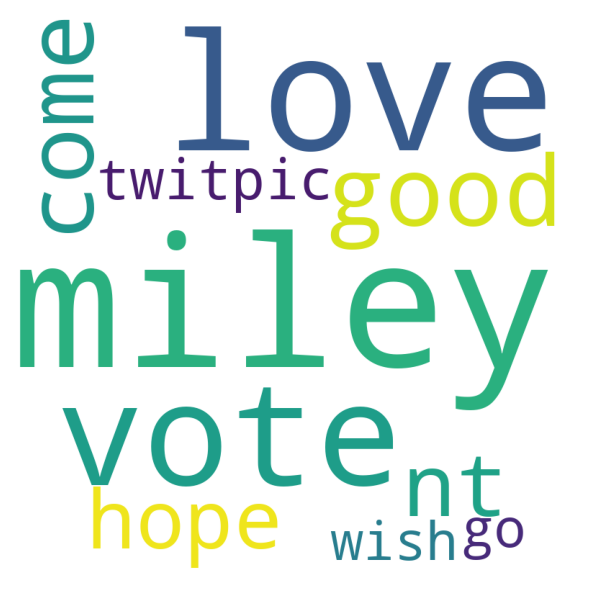

In [40]:
#for val in dataset1.corpus: 

   # typecaste each val to string 
#   val = str(val) 

   # split the value 
#   tokens = val.split() 

# Converts each token into lowercase 
#for i in range(len(tokens)): 
#    tokens[i] = tokens[i].lower() 

#for words in tokens: 
#    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, max_words=10,
            min_font_size = 10).generate(dataset1.corpus.to_string().replace("mileycyrus","")) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 